Summary on online property findings

In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from property import *
from accumulate_data import *

Reloaded


In [2]:
%run accumulate_data.py

There was a problem whith request. Status code is 404. It happened in query_search()


# Property characteristics over time

In [3]:
# read data
# list of results
dir_list = os.listdir('Data')
df = pd.DataFrame()
cities = list(set([item[key] for item in search_params for key in item.keys() if key == 'city']))

for item in dir_list:
    pn = os.path.join('Data', item)
    tmp = pd.read_excel(pn)
    df = pd.concat([df, tmp], sort=False)

    

In [4]:
def boxplot_history(df, y='price', city='Szeged', prop_type='House', color='skyblue'):
    if 'Date' not in df.columns:
        raise KeyError('`Date` column has to be in your dataframe')
    #tmp = df[(df.type==prop_type) & (df.city==city)].copy()
    tmp = df[(df.type==prop_type)].copy()
    tmp['Date'] = tmp['Date'].dt.strftime('%Y-%m-%d')
    chart=sns.catplot(x="Date", y=y, data=tmp, col='city',kind="box", sharey=False, color=color)
    chart.set_xticklabels(rotation=45)
    #sns.boxplot(x='Date', y=y, data=tmp, color='skyblue')

## House price and unit price boxplots as function of time

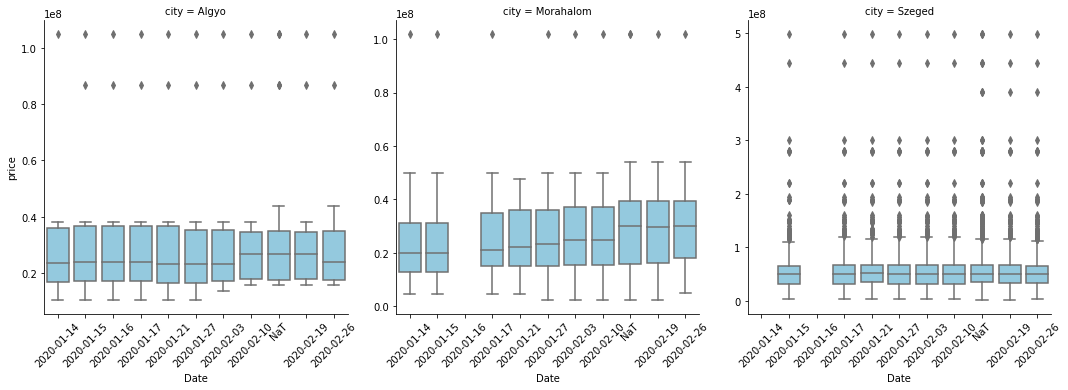

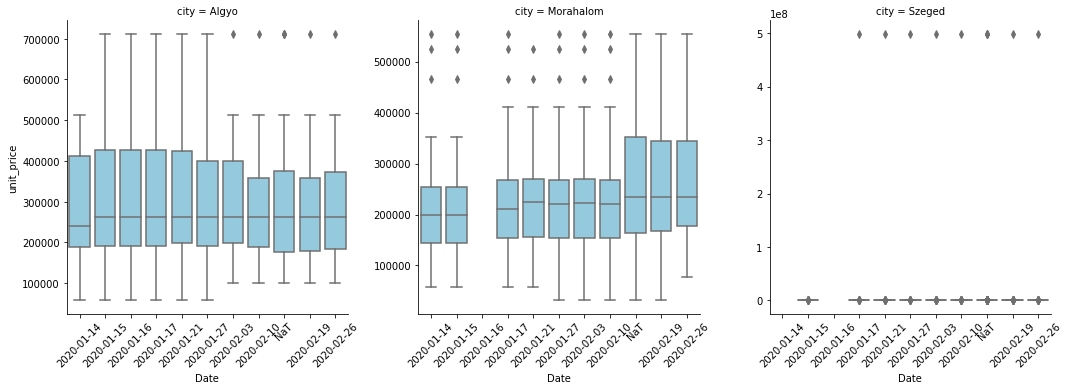

In [5]:
boxplot_history(df, y='price')
boxplot_history(df, y='unit_price')

## Flat price and unit price boxplots as function of time

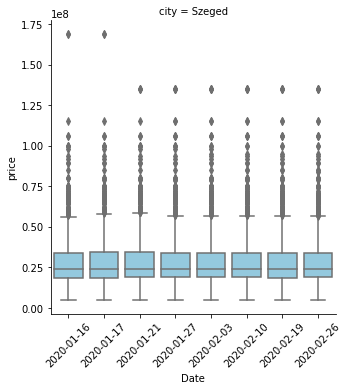

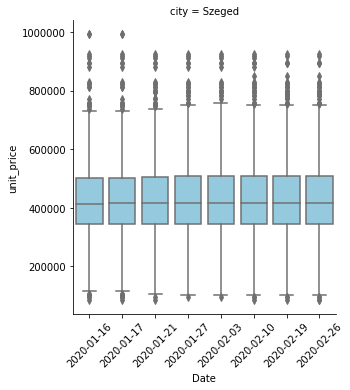

In [6]:
boxplot_history(df, y='price', prop_type='Flat')
boxplot_history(df, y='unit_price', prop_type='Flat')

## Garage price and unit price boxplots as function of time

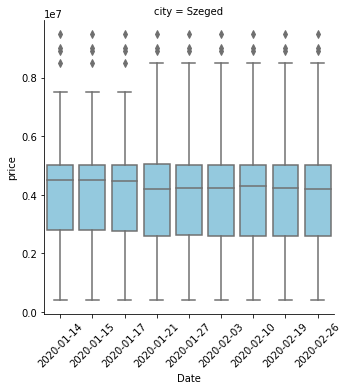

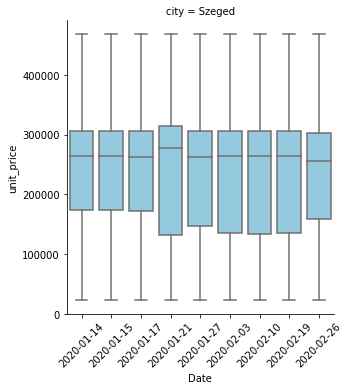

In [7]:
boxplot_history(df, y='price', prop_type='Garage')
boxplot_history(df, y='unit_price', prop_type='Garage')

## Average house prices

In [8]:
# average price per property
avp_house = pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='price', columns='city')
avp_flat  = pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='price', columns='city')
avp_garage= pd.pivot(av[av.type=='Garage'].reset_index(), index='Date', values='price', columns='city')

# average price per sqmeter
avpm_house = pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='unit_price', columns='city')
avpm_flat  = pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='unit_price', columns='city')
avpm_garage= pd.pivot(av[av.type=='Garage'].reset_index(), index='Date', values='unit_price', columns='city')

# average house size
avs_house = pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='size', columns='city')
avs_flat  = pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='size', columns='city')
avs_garage= pd.pivot(av[av.type=='Garage'].reset_index(), index='Date', values='size', columns='city')

# average land size
avls_house = pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='land_size', columns='city')
avls_flat  = pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='land_size', columns='city')
avls_garage= pd.pivot(av[av.type=='Garage'].reset_index(), index='Date', values='land_size', columns='city')

# average counts
avc_house = pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='count', columns='city')
avc_flat  = pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='count', columns='city')
avc_garage= pd.pivot(av[av.type=='Garage'].reset_index(), index='Date', values='count', columns='city')

In [9]:
def plot_averages(price, psm, size, lsize, count, figs=(15,10), style='o-', ms=10, title_text='House'):
    fig, axes = plt.subplots(2, 3, figsize=figs)
    fig.tight_layout(pad=6.6)
    price.plot(ax=axes[0,0], style=style, ms=ms)
    psm.plot(ax=axes[0,1], style=style, ms=ms)
    size.plot(ax=axes[0,2], style=style, ms=ms)
    lsize.plot(ax=axes[1,0], style=style, ms=ms)
    count.plot(ax=axes[1,1], style=style, ms=ms)
    axes[0,0].set_title('Average ' + title_text + ' price')
    axes[0,1].set_title('Average ' + title_text + ' price/square meter')
    axes[0,2].set_title('Average ' + title_text + ' size')
    axes[1,0].set_title('Average ' + title_text + ' land size')
    axes[1,1].set_title('Average ' + title_text + ' count')

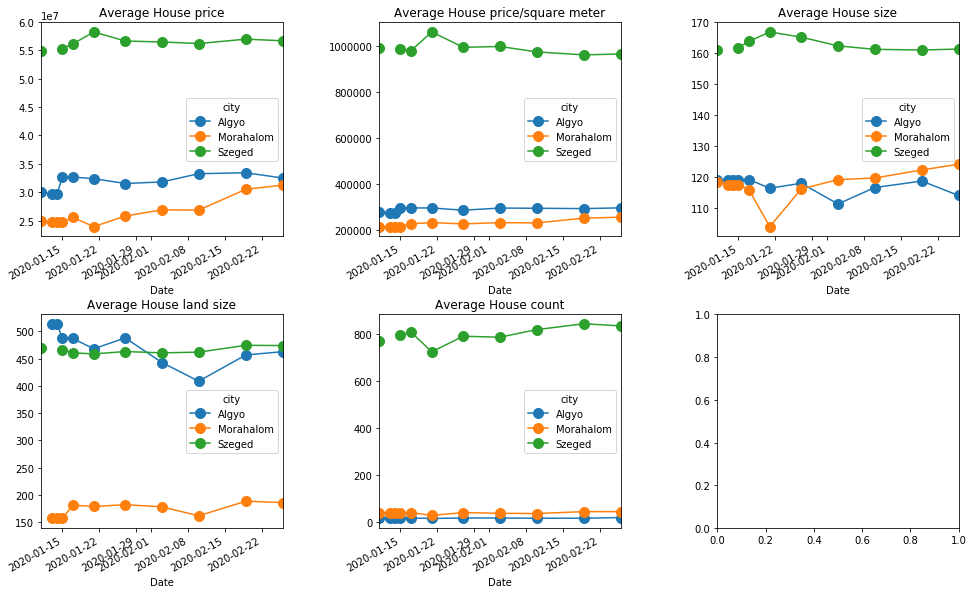

In [10]:
plot_averages(avp_house, avpm_house, avs_house, avls_house, avc_house)

## Average flat prices

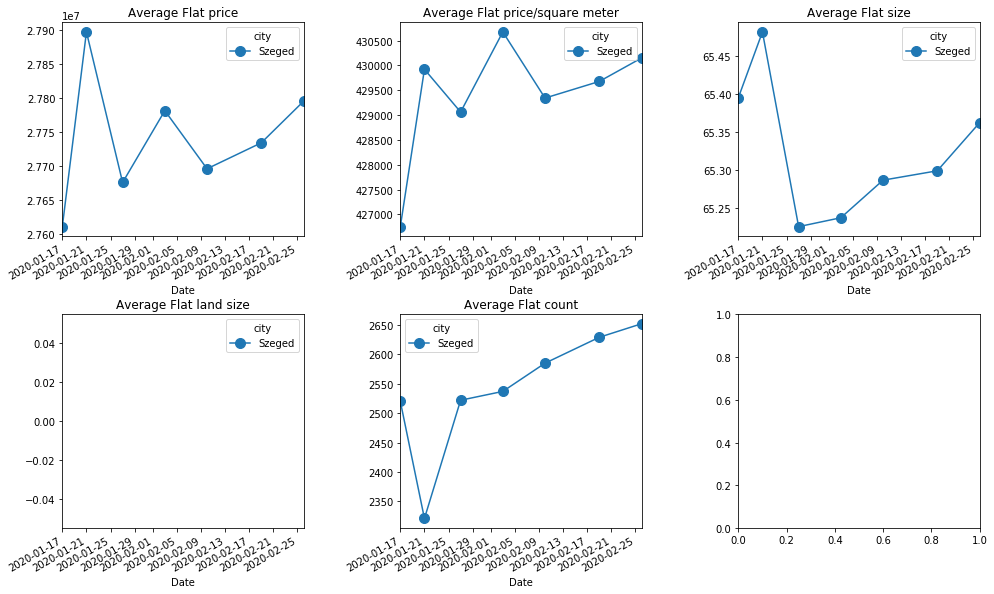

In [11]:
plot_averages(avp_flat, avpm_flat, avs_flat, avls_flat, avc_flat, title_text='Flat')

## Average Garage Characteristics

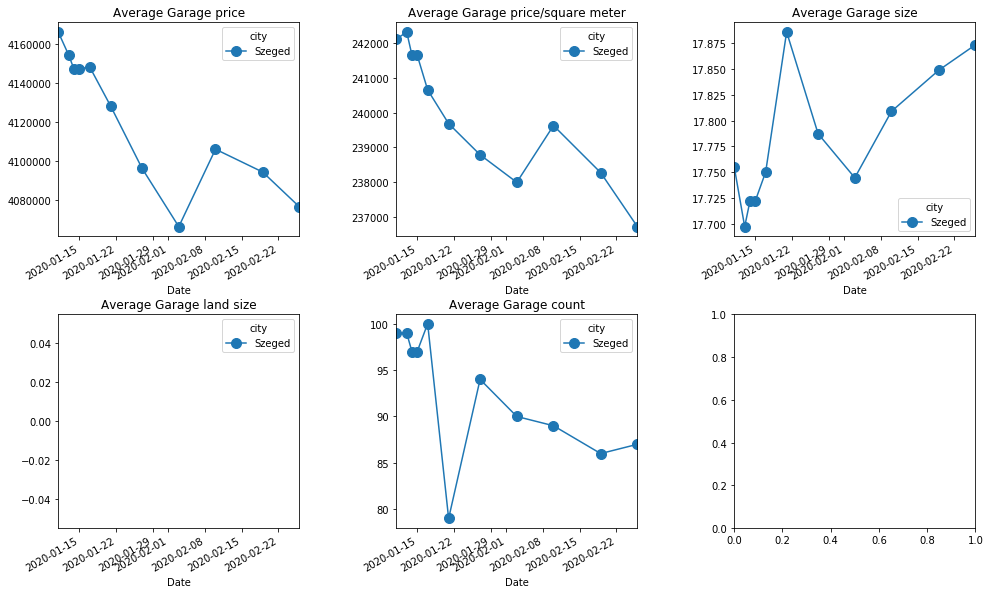

In [12]:
plot_averages(avp_garage, avpm_garage, avs_garage, avls_garage, avc_garage, title_text='Garage')

# Most recent statistics

In [13]:
def plot_boxes(df, ax, target='price', prop_type='House', city='Szeged', by='condition', cond=None, rot=50, color='skyblue'):
    red_square = dict(markerfacecolor='r', marker='s')
    boxprops = dict(linestyle='-', linewidth=3, color=color)
    medianprops = dict(linestyle='-', linewidth=3, color='r')
    if cond is None:
        df[(df['type']==prop_type) & (df['city']==city)].boxplot(by=by, column=target, rot=50, 
                            medianprops=medianprops, ax=ax, flierprops=red_square, 
                            showfliers=False, showmeans=True, boxprops=boxprops)
    else:
        df[(df['type']==prop_type) & (df['city']==city) & cond].boxplot(by=by, column=target, 
                            medianprops=medianprops, rot=50, ax=ax, flierprops=red_square, 
                            showfliers=False, showmeans=True, boxprops=boxprops)
    

## Boxplot of house prices as the function of condition

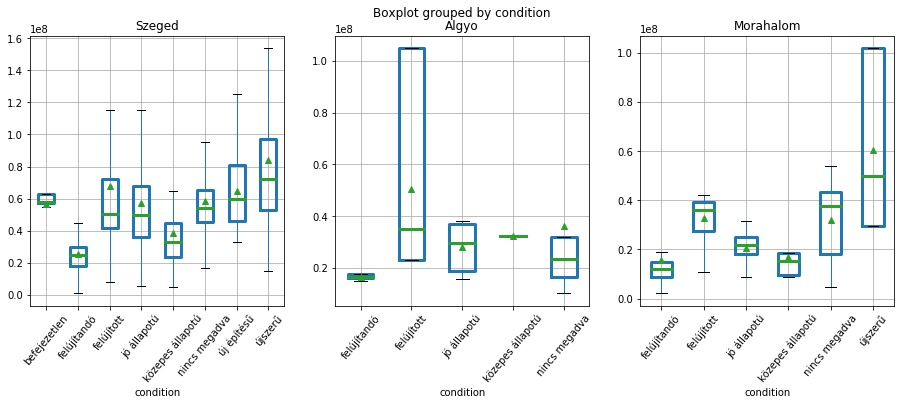

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout(pad=5.6)
for ii, city in enumerate(cities):
    plot_boxes(df, ax=axes[ii], target='price', prop_type='House', city=city, by='condition')
    axes[ii].set_title(city)

### Boxplot of house prices with 110-130 m2 size and >350m2 land size in Szeged

Text(0.5, 1.0, 'Szeged')

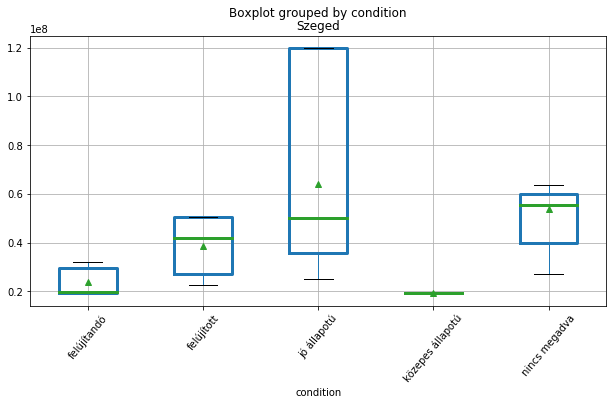

In [15]:
fig, axes = plt.subplots(1, figsize=(10,5))
city='Szeged'
cond_size = (df['size'] > 110) & (df['size'] < 130 )
cond_land_size = (df['land_size'] > 600)
cond = cond_size & cond_land_size
plot_boxes(df, ax=axes, target='price', prop_type='House', city=city, by='condition', cond=cond)
axes.set_title(city)

## Boxplot of flat prices as the function of condition

Text(0.5, 1.0, 'Szeged')

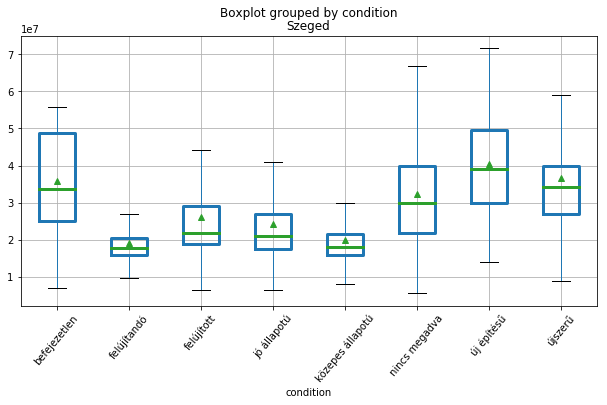

In [16]:
fig, axes = plt.subplots(1, figsize=(10,5))
city='Szeged'
plot_boxes(df, ax=axes, target='price', prop_type='Flat', city=city, by='condition')
axes.set_title(city)

### Boxplot of flat prices in the city center

Text(0.5, 1.0, 'Szeged')

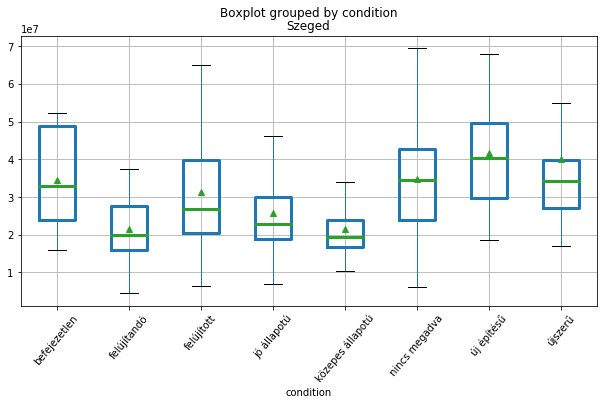

In [17]:
fig, axes = plt.subplots(1, figsize=(10,5))
city='Szeged'
cond=df['description'].apply(lambda x: 'belváros' in x)
plot_boxes(df, ax=axes, target='price', prop_type='Flat', city=city, by='condition', cond=cond)
axes.set_title(city)

### Boxplot of flat prices in the city center with size between 50-60 m2

Text(0.5, 1.0, 'Szeged')

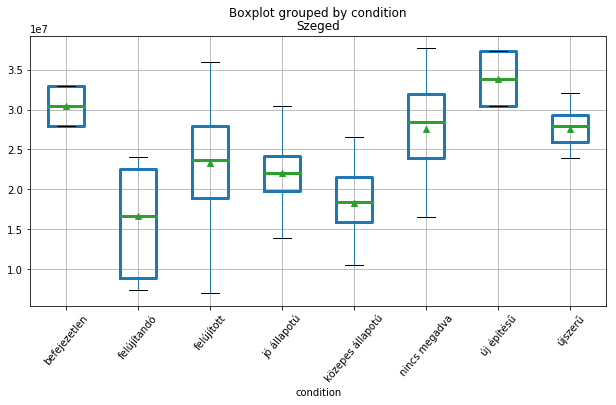

In [18]:
fig, axes = plt.subplots(1, figsize=(10,5))
city='Szeged'
cond=df['description'].apply(lambda x: 'belváros' in x)
cond_size = (df['size'] > 50) & (df['size'] < 60 )
cond_final = cond & cond_size
plot_boxes(df, ax=axes, target='price', prop_type='Flat', city=city, by='condition', cond=cond_final)
axes.set_title(city)

## Boxplot of garage prices as the function of condition

Text(0.5, 1.0, 'Szeged')

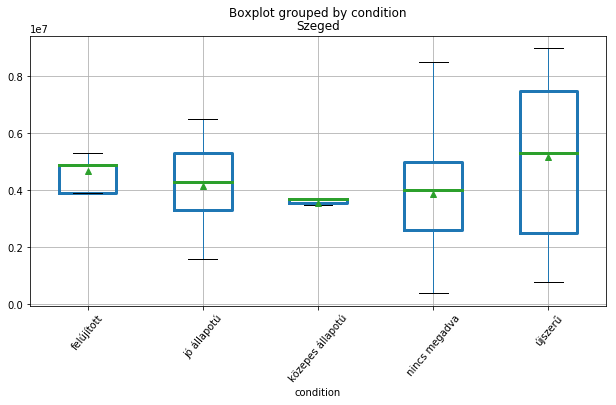

In [19]:
fig, axes = plt.subplots(1, figsize=(10,5))
city='Szeged'
plot_boxes(df, ax=axes, target='price', prop_type='Garage', city=city, by='condition')
axes.set_title(city)

In [21]:
date = dt.datetime.today()
html_path_name = 'Html'
filename_ipynb = 'Summary_for_flats_template.ipynb'
html_name = os.path.join(html_path_name, date.strftime('%Y%m%d') + '.html')

os.system('jupyter nbconvert --no-input --output ' + html_name + ' --to html ' + filename_ipynb)


0